

### 📌 AR(p)モデルとPACFの関係

AR(p)モデルの次数 $p$ を見つける鍵は、**PACFが「p次でカットオフ（cut off）する」**という性質にあります。

---

### 1. AR(p)モデルとは？

まず、AR(p)モデルは「**AutoRegressive model**（自己回帰モデル）」の略で、次数が $p$ のモデルは以下のように表されます。

$$
Y_t = c + \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \dots + \phi_p Y_{t-p} + \epsilon_t
$$

* **直感的な意味:**
    * 現在の値 ($Y_t$) は、**$p$ 期前までの過去の値** ($Y_{t-1}$ から $Y_{t-p}$ まで) の線形結合（重み付きの足し算）で決まる、というモデルです。
* **重要な点:**
    * $Y_t$ は、$p$ 期前の $Y_{t-p}$ には**直接**影響を受けます。
    * しかし、$p+1$ 期前の $Y_{t-(p+1)}$ からは**直接的な影響を受けません**。（あくまで $Y_{t-1}$ などを介した間接的な影響しかありません）

---

### 2. PACF（偏自己相関係数）とは？

PACF (Partial AutoCorrelation Function) は、ACF（自己相関係数）とよく似ていますが、決定的な違いがあります。

* **ACF (ラグ $k$)**: $Y_t$ と $Y_{t-k}$ の「**生の**」相関係数です。
    * これには、$Y_t \leftarrow Y_{t-1} \leftarrow \dots \leftarrow Y_{t-k}$ のような、**間にある全ての変数を介した間接的な影響**が**すべて含まれて**しまいます。
    * AR(1)モデル（$Y_t = 0.9 Y_{t-1} + \epsilon_t$）でも、ACFはゆっくり減衰しましたよね。あれは $Y_t$ と $Y_{t-3}$ の間に直接の関係がなくても、$Y_{t-1}$ と $Y_{t-2}$ を介した間接的な関係が強いためです。

* **PACF (ラグ $k$)**: $Y_t$ と $Y_{t-k}$ の「**純粋な**」相関係数です。
    * これは、**間にある変数 ($Y_{t-1}, Y_{t-2}, \dots, Y_{t-k+1}$) の影響を全て取り除いた後**で、なお残る $Y_t$ と $Y_{t-k}$ の相関を測ります。
    * 「他の変数の影響を（統計的に）無視した場合の、2変数間の**直接的な関係の強さ**」とイメージすると分かりやすいです。

---

### 3. なぜAR(p)の次数決定にPACFを使うのか？

AR(p)モデルの定義と、PACFの定義を組み合わせると、以下の非常に美しい関係が導かれます。

> **AR(p)モデルのPACFは、ラグ $p$ までは（通常）ゼロではない値を持つが、ラグ $p+1$ 以降は（理論上）完全に 0 となる。**

**【理由】**
AR(p)モデル ($Y_t = \dots + \phi_p Y_{t-p} + \epsilon_t$) は、定義上、$p$ 期前までは**直接**関係があります。
しかし、$p+1$ 期前 ($Y_{t-(p+1)}$) とは**直接の関係がありません**。

PACFは「直接的な関係」を測る指標でした。
したがって、

* PACF(ラグ1) 〜 PACF(ラグ $p$)： 直接関係があるので、値を持つ。（$\ne 0$）
* PACF(ラグ $p+1$)： 直接関係がないので、**0** になる。
* PACF(ラグ $p+2$)： 同様に **0** になる。
* ...

この「**$p$ 次のラグで急に 0 に落ちる**」という性質を「**p次でカットオフする（打ち切れる）**」と呼びます。

---

### 📊 実例：AR(2)モデルのPACF

AR(2)モデル（例：$Y_t = 0.7 Y_{t-1} - 0.3 Y_{t-2} + \epsilon_t$）のデータを生成し、ACFとPACFをプロットしてみましょう。

* **予想:**
    * **ACF:** 間接的な影響が残るため、ゆっくりと減衰するはず。
    * **PACF:** AR(**2**)モデルなので、ラグ**2**までは値を持つが、ラグ**3**以降で「カットオフ」し、0になるはず。



findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont:

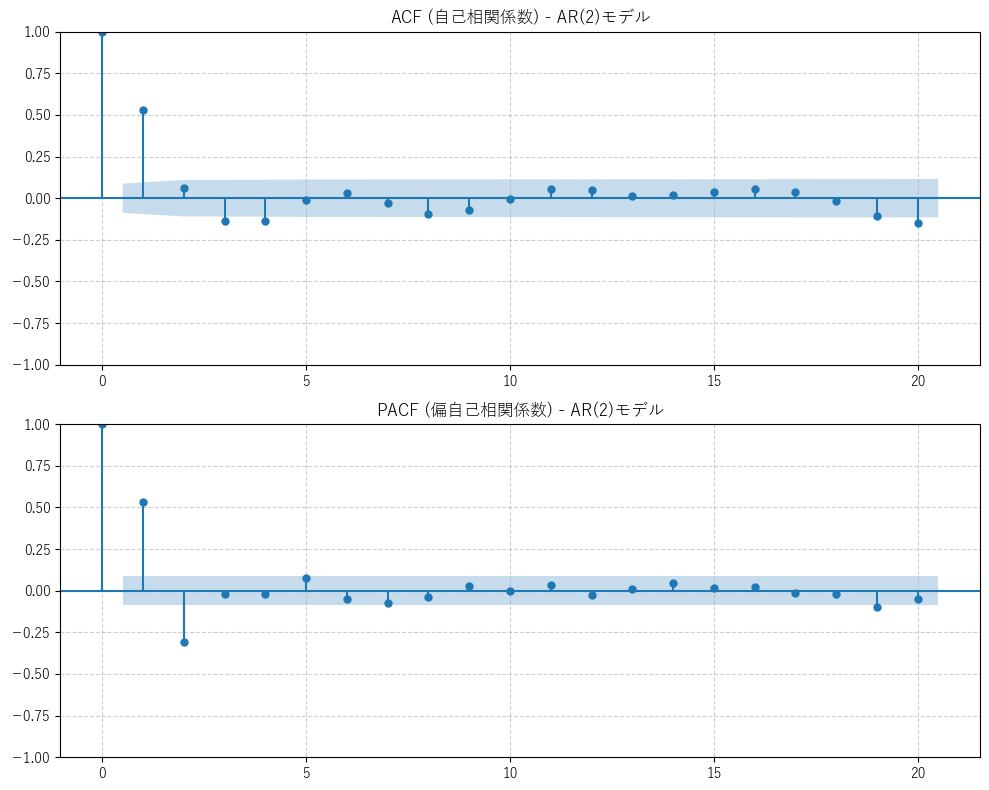

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 日本語フォント設定
try:
    plt.rcParams['font.family'] = ['Hiragino Sans', 'Yu Gothic', 'Meiryo', 'TakaoPGothic', 'Noto Sans CJK JP', 'sans-serif']
except Exception:
    plt.rcParams['font.family'] = 'sans-serif'

# AR(2)モデルの定義
# Y_t = 0.7 * Y_{t-1} - 0.3 * Y_{t-2} + epsilon
ar_params = np.array([1, -0.7, 0.3]) # statsmodelsでは [1, -phi_1, -phi_2] と指定
ma_params = np.array([1])
ar_process = ArmaProcess(ar_params, ma_params)

# データを生成
np.random.seed(42)
y = ar_process.generate_sample(nsample=500)

# ACFとPACFのグラフを描画
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# ACFのプロット
plot_acf(y, ax=axes[0], lags=20, title='ACF (自己相関係数) - AR(2)モデル')
axes[0].grid(True, linestyle='--', alpha=0.6)

# PACFのプロット
plot_pacf(y, ax=axes[1], lags=20, title='PACF (偏自己相関係数) - AR(2)モデル', method='ywm') # method='ywm'を指定
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()

# 画像を保存
plt.savefig('ar2_acf_pacf_plots.png')

**【グラフの解釈】**
（グラフの青い帯は「信頼区間」で、棒がこの中に入っていれば「統計的に0とみなせる」ことを示します）

* **上のACF:** 予想通り、ゆっくりと0に近づいています（減衰）。これだけ見ても、ARの次数 $p$ を決めるのは困難です。
* **下のPACF:** 予想通り、ラグ1とラグ2では信頼区間を大きく超える値（直接的な相関）を持っています。しかし、**ラグ3以降は全て信頼区間の内側**に収まっており、「統計的に0」とみなせます。

このPACFのグラフから、「**ラグ2でカットオフしている**」ことが明確に読み取れるため、このデータは **AR(2)** モデルで説明するのが妥当だろう、と次数 $p=2$ を決定することができます。

---

このARモデルとPACFの関係は、時系列分析の基本となります。

次は、これと対になる「**MA(q)モデルとACF（自己相関係数）**」の関係について解説するのはいかがでしょうか？